<a href="https://colab.research.google.com/github/Jayanth20/CSE-598/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax, Input
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Importing Data

In [ ]:
url = '/content/gdrive/MyDrive/HousingData/housing.csv'
#  column_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
#                 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

raw_dataset = pd.read_csv(url, na_values='?', comment='\t',
                          sep=',', skipinitialspace=True)


In [ ]:
dataset = raw_dataset.copy()
dataset.tail()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
dataset.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [ ]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
dataset.dropna(inplace = True)

In [ ]:
dataset.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
dataset.shape

(20433, 10)

In [ ]:
dataset['longitude'].dtype

dtype('float64')

In [ ]:
#Creating the dummy values for ocean_proximity
dataset = pd.get_dummies(data = dataset, columns = ['ocean_proximity'] , prefix = ['ocean_proximity'] , drop_first = True)

In [ ]:
input_train_data = dataset.drop(columns = ["median_house_value"])
output_train_data = dataset.pop("median_house_value")

In [ ]:
input_train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
ocean_proximity_INLAND,20433.0,0.317917,0.465678,0.0000,0.0000,0.0000,1.000,1.0000
ocean_proximity_ISLAND,20433.0,0.000245,0.015641,0.0000,0.0000,0.0000,0.000,1.0000


In [ ]:
input_train_data = (input_train_data - input_train_data.mean()) / input_train_data.std()

In [ ]:
input_train_data.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [ ]:
input_train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327281,1.051692,0.982139,-0.803793,-0.970301,-0.973296,-0.976809,2.345106,-0.682697,-0.015644,2.828592,-0.384177
1,-1.322290,1.042330,-0.606195,2.042080,1.348243,0.861318,1.670332,2.332575,-0.682697,-0.015644,2.828592,-0.384177
2,-1.332272,1.037649,1.855723,-0.535176,-0.825541,-0.819749,-0.843406,1.782896,-0.682697,-0.015644,2.828592,-0.384177
3,-1.337263,1.037649,1.855723,-0.623495,-0.718750,-0.765037,-0.733544,0.932947,-0.682697,-0.015644,2.828592,-0.384177
4,-1.337263,1.037649,1.855723,-0.461959,-0.611959,-0.758860,-0.628914,-0.013143,-0.682697,-0.015644,2.828592,-0.384177


#### Train the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_train_data, output_train_data, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape

(14303, 12)

In [ ]:

from tensorflow.python import metrics
from tensorflow.keras.layers import Normalization

numpy_train_data = np.array(X_train)

normalizer = Normalization(input_shape = [12, ], axis = None)
normalizer.adapt(numpy_train_data)

def buildModel(model_name, hidden_layers):
  layers = [normalizer, Dense(12)] + hidden_layers + [tf.keras.layers.Dense(1)]
  model = tf.keras.Sequential(layers, name = model_name)
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss='mean_absolute_error')
  return model


In [ ]:
num_units = 32
models = []
for i in range(1, 4):
  model_arr = []
  for j in range(i):
    model_arr.append(tf.keras.layers.Dense(num_units, activation='relu'))
  models.append(buildModel(f"Model{i}", model_arr))


In [ ]:
obj = []
for i in range(0, 3):
  print("------------ Model ",  i , "----------------")
  obj.append(models[i].fit(X_train, y_train.to_numpy(), validation_split = 0.2, batch_size = 32, epochs = 100, verbose = 1))

------------ Model  0 ----------------
Epoch 1/100
358/358 [==============================] - 1s 2ms/step - loss: 174068.7969 - val_loss: 122890.3984
Epoch 2/100
358/358 [==============================] - 1s 2ms/step - loss: 109095.0234 - val_loss: 103343.1562
Epoch 3/100
358/358 [==============================] - 1s 2ms/step - loss: 91038.4141 - val_loss: 86048.7344
Epoch 4/100
358/358 [==============================] - 1s 2ms/step - loss: 78998.2812 - val_loss: 75001.1797
Epoch 5/100
358/358 [==============================] - 1s 2ms/step - loss: 60749.3164 - val_loss: 58242.6055
Epoch 6/100
358/358 [==============================] - 1s 2ms/step - loss: 55449.1875 - val_loss: 57740.6094
Epoch 7/100
358/358 [==============================] - 1s 2ms/step - loss: 54842.7461 - val_loss: 57098.1094
Epoch 8/100
358/358 [==============================] - 1s 2ms/step - loss: 54355.3633 - val_loss: 56648.6797
Epoch 9/100
358/358 [==============================] - 1s 2ms/step - loss: 54025.5469

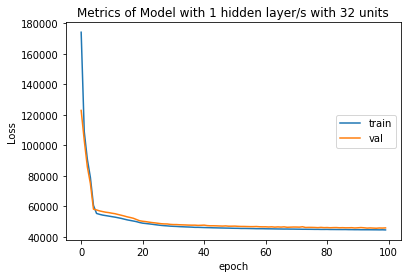

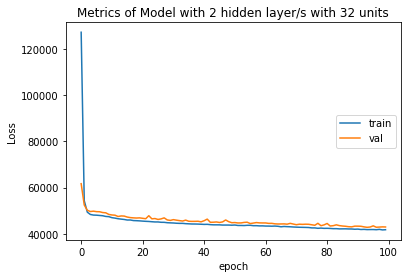

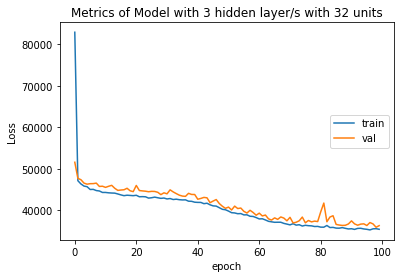

In [ ]:
IMG_PATH = "/content/gdrive/MyDrive/Images/Assignment2/Task1"

# Loss Plot
for i in range(len(models)):
  plt.clf()
  plt.plot(obj[i].history['loss'])
  plt.plot(obj[i].history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.legend(['train','val'], loc='center right')
  plt.savefig(f"{IMG_PATH}/Model_{i}_Loss.png")
  plt.title('Metrics of Model with ' + str(i+1) + " hidden layer/s with 32 units")
  plt.show()

In [ ]:
num_layers = 3
test_loss_values = []
for i in range(num_layers):
  test_loss = models[i].evaluate(X_test, y_test)
  test_loss_values.append(test_loss)

192/192 [==============================] - 1s 2ms/step - loss: 36174.3906


##### Constant Layer counts with varying number of neurons 

In [ ]:
num_units = [2 * i for i in range(1, 11)]
num_layers = 3

ml_models = []

for unit in num_units:
  model_arr = []
  for i in range(num_layers):
    model_arr.append(tf.keras.layers.Dense(unit, activation = "relu"))
  ml_models.append(buildModel(f"Model_with_{unit}_units", model_arr))

for model in ml_models:
  model.summary()


Model: "Model_with_2_units"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 12)               3         
 ion)                                                            
                                                                 
 dense_142 (Dense)           (None, 12)                156       
                                                                 
 dense_139 (Dense)           (None, 2)                 26        
                                                                 
 dense_140 (Dense)           (None, 2)                 6         
                                                                 
 dense_141 (Dense)           (None, 2)                 6         
                                                                 
 dense_143 (Dense)           (None, 1)                 3         
                                                

In [ ]:
obj2 = []
for i in range(len(num_units)):
  print("------------ML Model with constant Layers and ",  i , "units per layer", "----------------")
  obj2.append(ml_models[i].fit(X_train, y_train.to_numpy(), validation_split = 0.2, epochs = 100))

------------ML Model with constant Layers and  0 units per layer ----------------
Epoch 1/100
358/358 [==============================] - 1s 3ms/step - loss: 167213.9375 - val_loss: 125708.9844
Epoch 2/100
358/358 [==============================] - 1s 2ms/step - loss: 88346.9688 - val_loss: 61771.2188
Epoch 3/100
358/358 [==============================] - 1s 2ms/step - loss: 52740.9688 - val_loss: 51335.7500
Epoch 4/100
358/358 [==============================] - 1s 2ms/step - loss: 49237.7852 - val_loss: 50090.8047
Epoch 5/100
358/358 [==============================] - 1s 2ms/step - loss: 48320.2734 - val_loss: 50196.3008
Epoch 6/100
358/358 [==============================] - 1s 2ms/step - loss: 48119.9961 - val_loss: 49723.1055
Epoch 7/100
358/358 [==============================] - 1s 2ms/step - loss: 47998.2617 - val_loss: 49598.6172
Epoch 8/100
358/358 [==============================] - 1s 2ms/step - loss: 47910.2656 - val_loss: 49471.1797
Epoch 9/100
358/358 [=======================

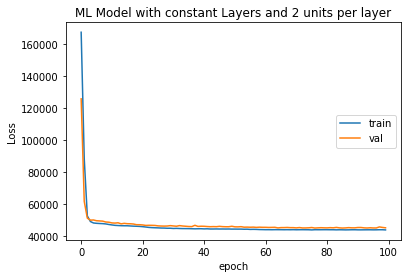

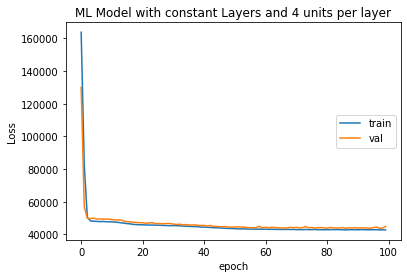

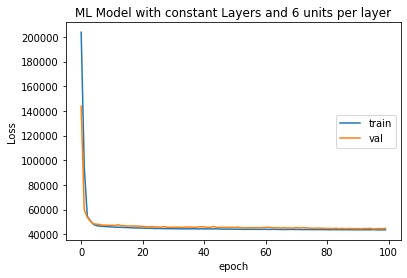

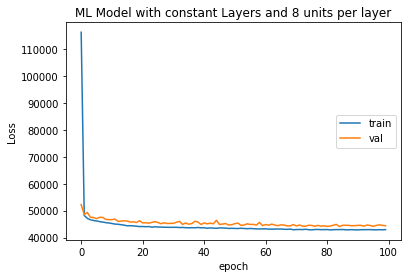

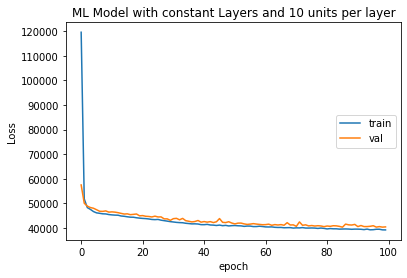

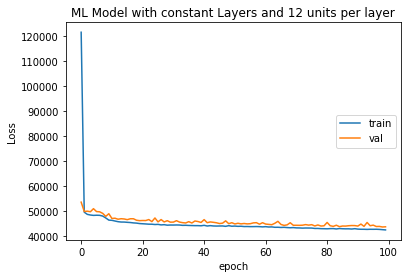

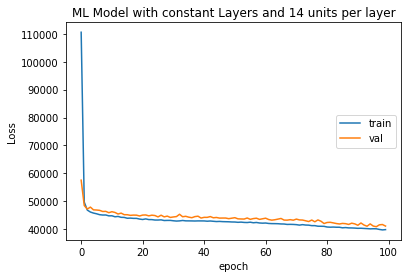

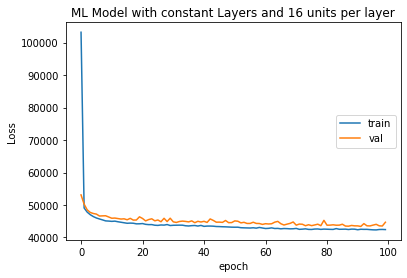

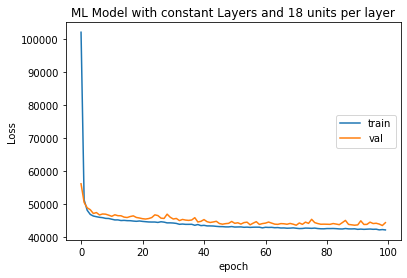

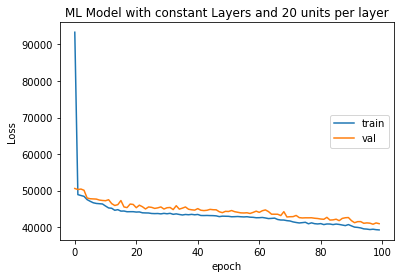

In [ ]:
IMG_PATH = "/content/gdrive/MyDrive/Images/Assignment2/Task2"

# Loss Plot
for i in range(len(ml_models)):
  plt.clf()
  plt.plot(obj2[i].history['loss'])
  plt.plot(obj2[i].history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.legend(['train','val'], loc='center right')
  plt.savefig(f"{IMG_PATH}/Model_{i}_Loss.png")
  plt.title("ML Model with constant Layers and " + str(num_units[i]) + " units per layer")
  plt.show()

In [ ]:
num_models = 10
test_loss_values_2 = []
for i in range(num_models):
  test_loss_2 = ml_models[i].evaluate(X_test, y_test)
  test_loss_values_2.append(test_loss_2)

192/192 [==============================] - 0s 2ms/step - loss: 40412.0703
